# <font color = LightGreen > **CA model of water dynamics and hydrophobic interactions** </font>

Authors:
- H. Malash, 15179192
- S. Bhusal, 14724383
- L. Pahladsingh, 13846566
- T. Glansdorp, 12748587

In [2]:
from model import CA_rules, CA_grid
from analysis import calculate_attributes
import analysis
import numpy as np
import matplotlib.pyplot as plt
import random

## <font color = LightBlue > **Background Information** </font>

Our cellular automaton (CA) model simulating an aqueous solution consists of a grid, representing the surface of a torus. Each cell, denoted as '$\textit{i}$' is surrounded by four neighbors '$\textit{j}$ ', and there is an additional cell two positions beyond '$\textit{i}$ ', labeled as '$\textit{k}$ '. We interpret the cell indicated by 'j' as the von Neumann neighborhood, and the cell indicated by 'k' as the extended von Neumann neighborhood.

The state of each cell, represented by binary numbers, signifies its occupancy. There are three possible options for occupancy within the system:

- An empty cell is denoted by 0.
- A cell containing water is indicated by 1.
- A cell containing solute is indicated by 2.

In our model, two parameters influence the movement of molecules within the grid: the $\textbf{breaking probability}$ ($P_B$) and the $\textbf{joining probability}$ ($J$). The combination of these probabilities determines the behavior of cell movement.

The $\textbf{breaking probability}$ ($P_B$) represents the probability of a molecule in cell $\textit{i}$ breaking away from a molecule in cell $\textit{j}$ when only one $\textit{j}$ cell is occupied. We have defined three specific breaking probabilities:

- $P_B(W)$: Water-water breaking probability
- $P_B(L)$: Solute-solute breaking probability
- $P_B(WL)$: Water-solute breaking probability

The  $\textbf{joining probability}$ ($J$) quantifies the ratio between the likelihood of a molecule at $\textit{i}$  moving towards an occupied $\textit{k}$ cell when $\textit{j}$  is empty and the probability of the same molecule at $\textit{i}$  moving towards an empty $\textit{k}$  cell when $\textit{j}$  is unoccupied. 

 is a positive number, when ($J=1$), it indicated that a molecule at $\textit{i}$ has the same probability to move towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. So the state of cell $\textit{k}$ does not matter. 

The parameter ($J$) is a positive number. When $J=1$, it signifies that a molecule at $\textit{i}$ has an equal probability of moving towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. In this case, the state of cell $\textit{k}$ does not influence the movement probability. As before we have three distinct joining probabilities: $J(W)$, $J(L)$ and $J(WL)$.

### <font> **Moving probability** </font> 
Combining $P_B$ and $J$, we obtaining the moving probability of a cell $p_m$: </br>
$p_m$ = sum of $p_m(d)$ over all possible $\textit{d}$ if the sum <1,
else 1 </br>

with

$p_m(d) = 1 / (1 + ((4-n)/(P_B^n) - 1) / J(d)) $ </br>
if n < 4 and $P_B$ > 0  </br>

$\textit{n}$ indicating the number of occupied $\textit{j}$ cells, there are $4-n$ directions for $\textit{i}$ to move. 

In the case where $J=1$, the moving probability ($p_m$) is equal to $P_B^n$. Given that all our research accepts this condition, we will focus on working with joint probabilities involving only $P_B$ to calculate the moving probability of a molecule.

$\textit{Information mainly based on}$: </br>
Kier, L. B., & Cheng, C. K. (1994). A Cellular Automata Model of an Aqueous Solution, Journal of Chemical Information and Computer Science.  34, 1334-1337


## <font color = LightBlue > **Water Grid** </font>

In [ ]:
pbw_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
results = []

runs = 5

all_results = {pbw: [] for pbw in pbw_values}
total_molecules = 2087 # 55x55x0.69

for pbw_value in pbw_values:
    
    pbw_results = []

    for run in range(runs):
        print(f"Running simulation with {pbw_value} pbw value.")
        ca_grid = CA_grid(solute_amount=0)
        ca_rules = CA_rules(ca_grid, pbw=pbw_value)

        final_grid = ca_rules.generate_simulation()

        f_o, f_1, f_2, f_3, f_4 = calculate_attributes(grid=ca_grid, rules=ca_rules)
        pbw_results.append(np.array([f_o, f_1, f_2, f_3, f_4]))

    pbw_results = np.array(pbw_results)

    average_results = np.mean(pbw_results, axis=0)
    std_dev_results = np.std(pbw_results, axis=0)

    all_results[pbw_value] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for pbw_value, data in all_results.items():
    print(f"Pbw value: {pbw_value}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

In [ ]:
for i, attribute in enumerate(['$f_0$', '$f_1$', '$f_2$', '$f_3$', '$f_4$']):
    averages = [all_results[pbw]['average'][i] for pbw in pbw_values]
    std_devs = [all_results[pbw]['std_dev'][i] for pbw in pbw_values]
    
    num_runs = 5
    confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)
    
    lower_bound = np.array(averages) - confidence_interval
    upper_bound = np.array(averages) + confidence_interval

    plt.plot(np.array(pbw_values), averages, label=attribute)
    plt.fill_between(np.array(pbw_values) / 2087 * 100, lower_bound, upper_bound, alpha=0.2)

    
plt.xlabel('Pbw value', fontsize=14, fontweight='bold')
plt.ylabel('Attribute Value', fontsize=14, fontweight='bold')
plt.ylim(0, 1)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Effect of Pbw values on Water Structure', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  

## <font color = LightBlue > **Water-Solute Grid** </font>

### <font color = Pink > **Influence of Water temperature on solubility** </font>

### <font color = Pink > **Influence of Solute Concentration** </font>

In [ ]:
solute_concentrations = [0, 50] #, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]
results = []
for solute_amount in solute_concentrations:
    print(f"Running simulation with {solute_amount} solute molecules.")
    ca_grid = CA_grid(solute_amount=solute_amount)
    ca_rules = CA_rules(ca_grid)
    final_grid = ca_rules.generate_simulation()

    f_o, f_1, f_2, f_3, f_4 = calculate_attributes(grid=ca_grid, rules=ca_rules)
    output = np.array([f_o, f_1, f_2, f_3, f_4])
    results.append(output)

results = np.array(results)
print(results)


In [ ]:

plt.plot(solute_concentrations, results.T[0], label='f_0')
plt.plot(solute_concentrations, results.T[1], label='f_1')
plt.plot(solute_concentrations, results.T[2], label='f_2')
plt.plot(solute_concentrations, results.T[3], label='f_3')
plt.plot(solute_concentrations, results.T[4], label='f_4')
plt.legend()
plt.show()

### <font color = Pink > **Influence of Water-Solute Breaking Probability** </font>

### Counting of unbound water molecules

In [ ]:
unbound_water_count = []

for pbw in np.arange(0, 1, 0.1):
    final_grid = CA_rules_only_water(CA_grid(), pbw).generate_simulation()
    total_height = 55
    total_width = 55
    print(pbw)

    unbound_water = analysis.count_unbound_water(final_grid, total_height, total_width)

    unbound_water_count.append(unbound_water)

print(unbound_water_count)


In [4]:
from analysis import count_neighbours
 
pbl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
solute_concentrations = [ 100, 200, 400, 600, 800]

results = []

runs = 1

all_results = {pbl: {} for pbl in pbl_values}

for pbl_value in pbl_values:
    for solute_concentration in solute_concentrations:
    
        pbl_results = []

        for run in range(runs):
            print(f"Running simulation with {pbl_value} pbwl value and {solute_concentration} solute concentration.")
            ca_grid = CA_grid(solute_amount=solute_concentration)
            ca_rules = CA_rules(ca_grid, pbw=0.4, pbl=pbl_value, pbwl_parameter=False, pbl_parameter=True)

            final_grid = ca_rules.generate_simulation(pbl=pbl_value, pbw=0.4)

            count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
            pbl_results.append(count)

        pbl_results = np.array(pbl_results)
        print(pbl_results)

        # Statistics for change in pbw;
        average_results_pbl = np.mean(pbl_results, axis=0) 
        std_dev_results_pbl = np.std(pbl_results, axis=0)

        all_results[pbl_value][solute_concentration] = {
            'average': average_results_pbl,
            'std_dev': std_dev_results_pbl
        }

for pbl_value, data in all_results.items():
    for solute_concentration, data in data.items():
        print(f"pbwl value: {pbl_value}")
        print(f"Solute concentration: {solute_concentration}")
        print(f"Average: {data['average']}")
        print(f"Standard Deviation: {data['std_dev']}")
        print()

Running simulation with 0.0 pbwl value and 100 solute concentration.
[]
Running simulation with 0.0 pbwl value and 200 solute concentration.
[]
Running simulation with 0.0 pbwl value and 400 solute concentration.
[]
Running simulation with 0.0 pbwl value and 600 solute concentration.
[]
Running simulation with 0.0 pbwl value and 800 solute concentration.
[]
Running simulation with 0.1 pbwl value and 100 solute concentration.
[]
Running simulation with 0.1 pbwl value and 200 solute concentration.
[]
Running simulation with 0.1 pbwl value and 400 solute concentration.
[]
Running simulation with 0.1 pbwl value and 600 solute concentration.
[]
Running simulation with 0.1 pbwl value and 800 solute concentration.
[]
Running simulation with 0.2 pbwl value and 100 solute concentration.
[]
Running simulation with 0.2 pbwl value and 200 solute concentration.
[]
Running simulation with 0.2 pbwl value and 400 solute concentration.
[]
Running simulation with 0.2 pbwl value and 600 solute concentrat

In [26]:
# Plotting each solute concentration as a separate line with a confidence interval
for solute_concentration in solute_concentrations:
    averages = [all_results[pbl][solute_concentration]['average'] for pbl in pbl_values]
    std_devs = [all_results[pbl][solute_concentration]['std_dev'] for pbl in pbl_values]

    # Calculate confidence interval
    num_runs = runs
    confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)
    lower_bound = np.array(averages) - confidence_interval
    upper_bound = np.array(averages) + confidence_interval

    # Plot the average neighbor count
    plt.plot(pbw_values, averages, label=f'Solute: {solute_concentration}')
    plt.fill_between(pbw_values, lower_bound, upper_bound, alpha=0.2)

plt.xlabel('$P_b(L)$')
plt.ylabel('Average Neighbor Count')
plt.title('Effect of Pb(L) and Solute Concentration on Neighbour Count')
plt.legend()
plt.grid(True)

# plt.xlim(0, 100)
plt.ylim(bottom=0) 

plt.figure(dpi=300)

plt.show()

KeyError: 0.0

In [25]:
solute_concentrations = [ 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
results = []

runs = 1

all_results = {solute_concentration: [] for solute_concentration in solute_concentrations}

for solute_concentration in solute_concentrations:
    
    solute_results = []

    for run in range(runs):
        print(f"Running simulation with {solute_concentration} solute concentration.")
        ca_grid = CA_grid(solute_amount=solute_concentration)
        ca_rules = CA_rules(ca_grid, pbwl=0.9, pbl=0.9, pbw_parameter=False, pbl_parameter=True, pbwl_parameter=True)

        final_grid = ca_rules.generate_simulation(pbl=0.9, pbwl=0.9)

        count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
        solute_results.append(count)

    solute_results = np.array(solute_results)
    print(solute_results)

    average_results = np.mean(solute_results, axis=0)
    std_dev_results = np.std(solute_results, axis=0)

    all_results[solute_concentration] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for solute_concentration, data in all_results.items():
    print(f"Pbw value: {solute_concentration}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

Running simulation with 100 solute concentration.
[3154]
Running simulation with 200 solute concentration.
[2272]
Running simulation with 400 solute concentration.
[1436]
Running simulation with 600 solute concentration.
[798]
Running simulation with 800 solute concentration.
[768]
Running simulation with 1000 solute concentration.
[966]
Running simulation with 1200 solute concentration.
[1416]
Running simulation with 1400 solute concentration.
[1778]
Running simulation with 1600 solute concentration.
[2822]
Running simulation with 1800 solute concentration.
[4004]
Running simulation with 2000 solute concentration.
[5520]
Pbw value: 100
Average: 3154.0
Standard Deviation: 0.0

Pbw value: 200
Average: 2272.0
Standard Deviation: 0.0

Pbw value: 400
Average: 1436.0
Standard Deviation: 0.0

Pbw value: 600
Average: 798.0
Standard Deviation: 0.0

Pbw value: 800
Average: 768.0
Standard Deviation: 0.0

Pbw value: 1000
Average: 966.0
Standard Deviation: 0.0

Pbw value: 1200
Average: 1416.0
Stan

[3154.0, 2272.0, 1436.0, 798.0, 768.0, 966.0, 1416.0, 1778.0, 2822.0, 4004.0, 5520.0]
[4.791566842357451, 9.583133684714902, 19.166267369429804, 28.74940105414471, 38.33253473885961, 47.91566842357451, 57.49880210828942, 67.0819357930043, 76.66506947771921, 86.24820316243411, 95.83133684714902]


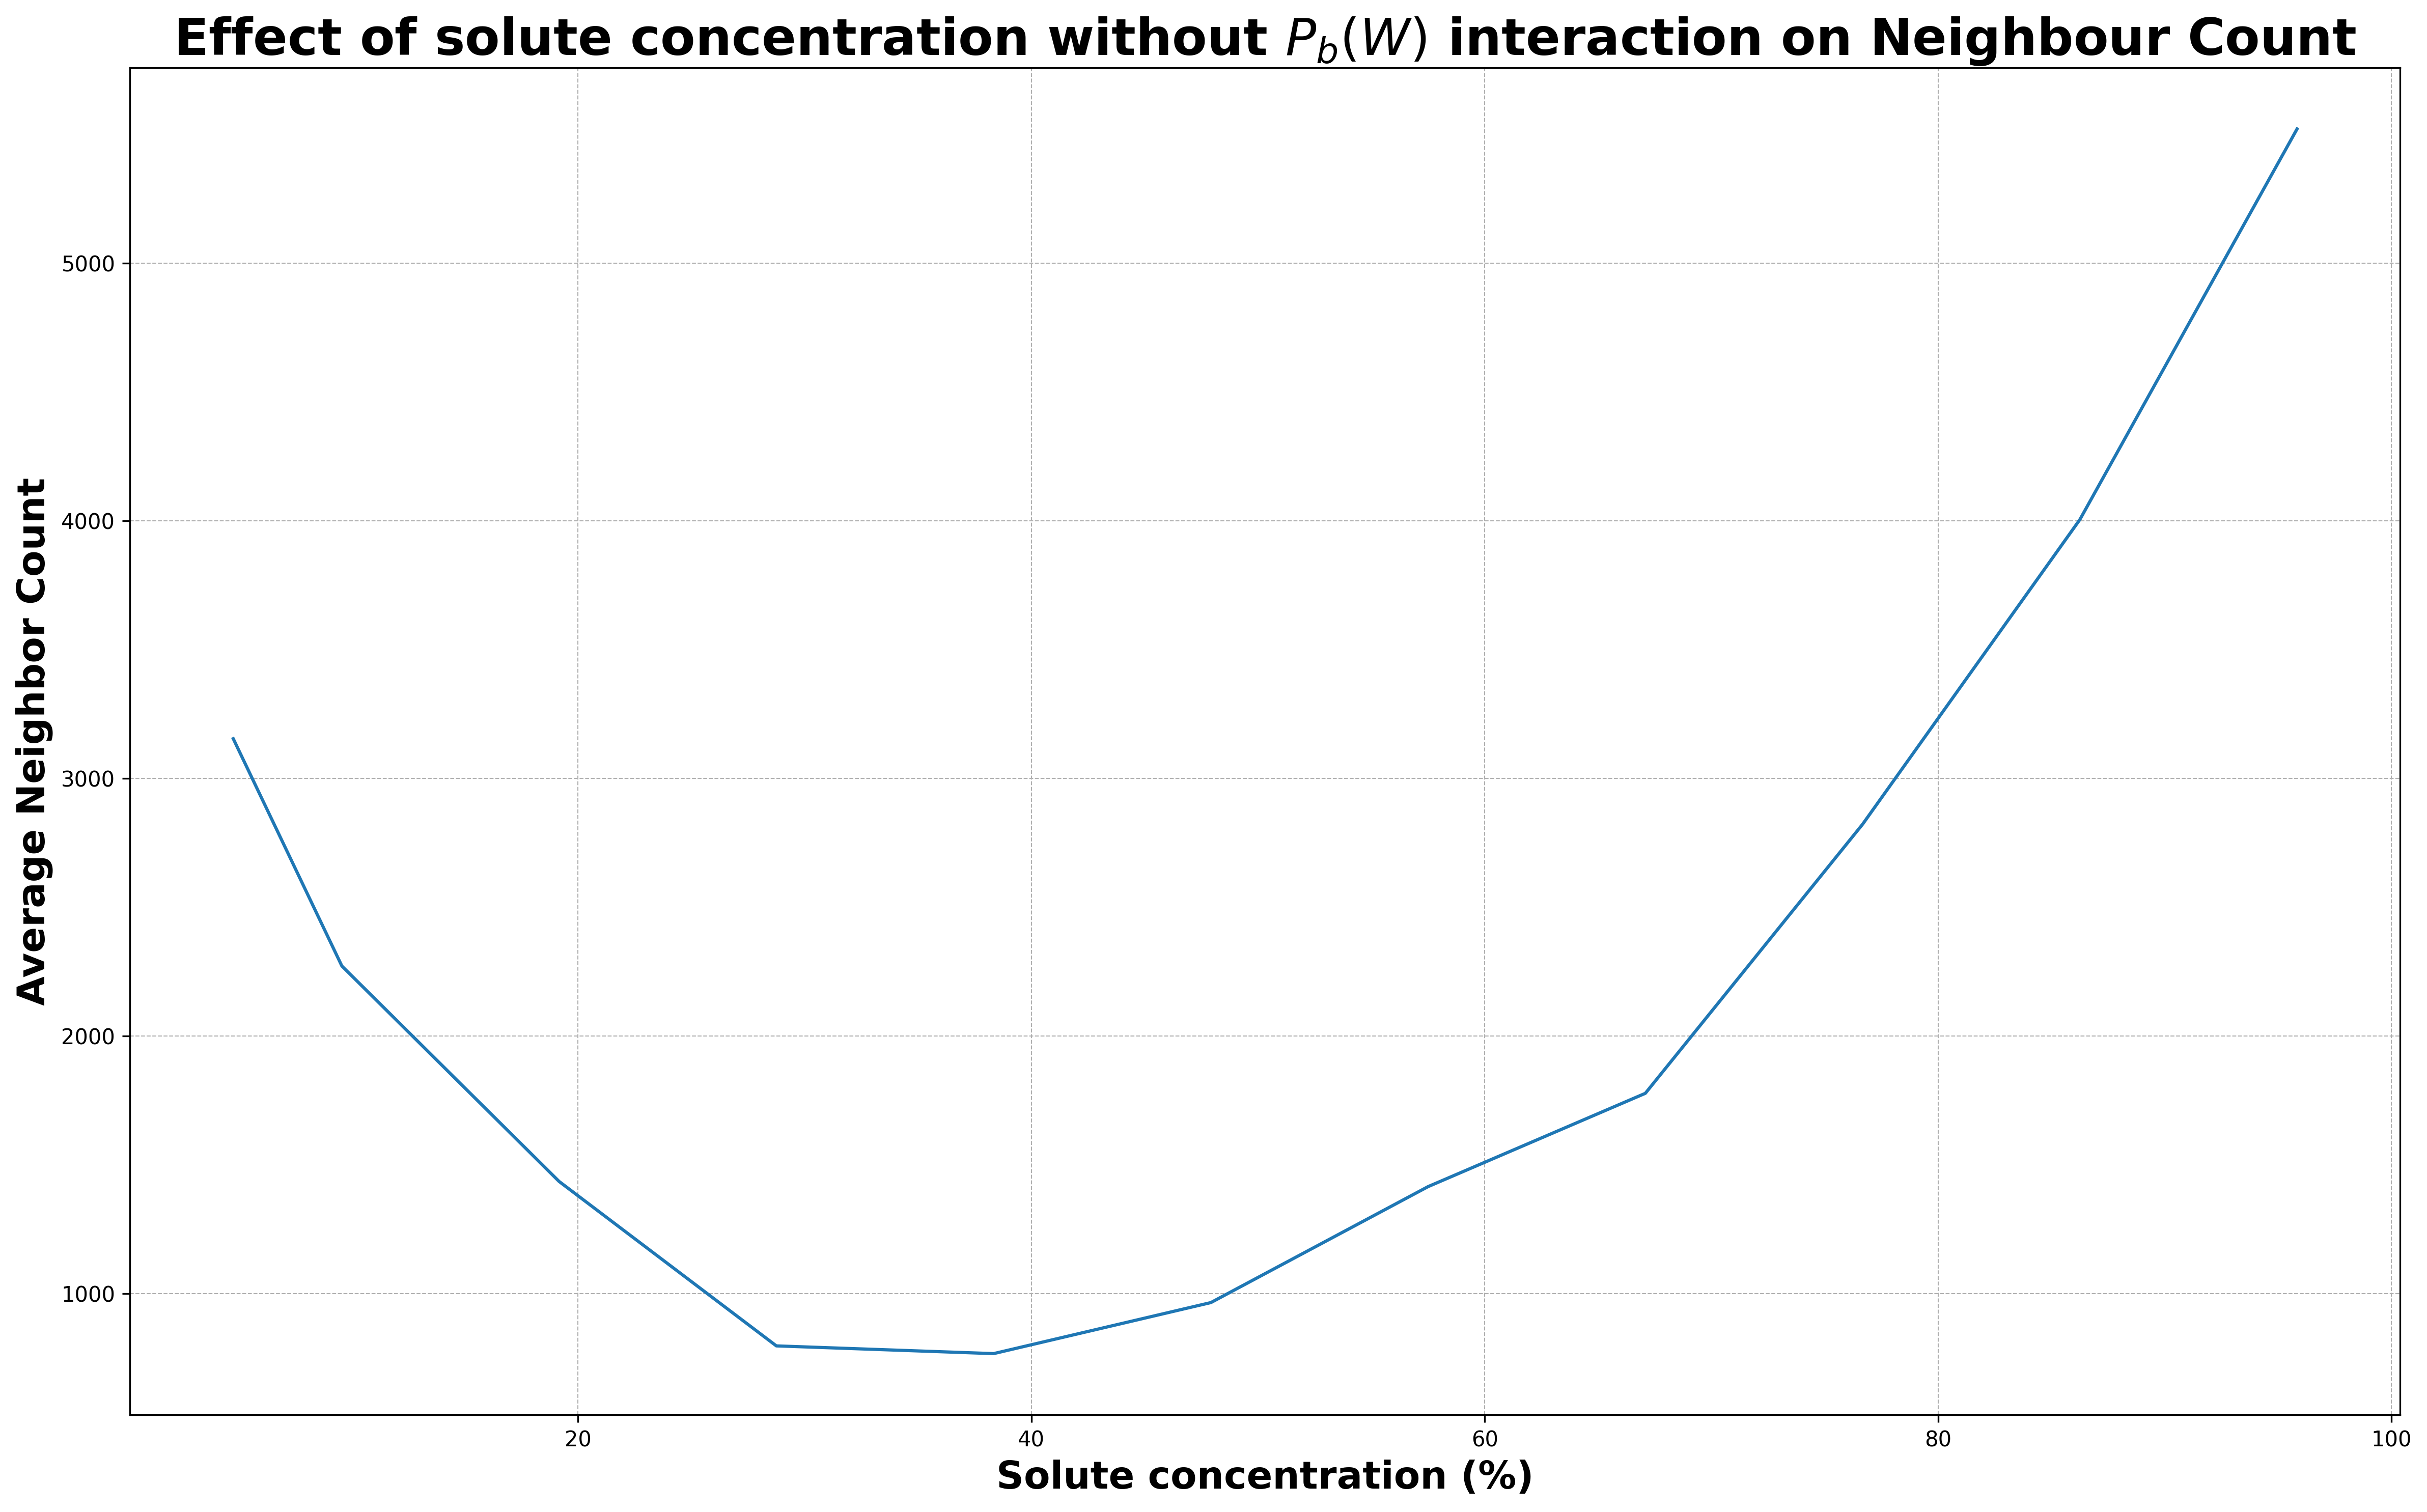

In [27]:
solute_values_percent = [value / 2087 * 100 for value in solute_concentrations]  # Convert to percentage

# Extract averages and standard deviations for plotting
averages = [all_results[solute_concentration]['average'] for solute_concentration in solute_concentrations]
std_devs = [all_results[solute_concentration]['std_dev'] for solute_concentration in solute_concentrations]
print(averages)
print(solute_values_percent)

# Calculate confidence interval for error bars
num_runs = 1
confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)

# Calculate lower and upper bounds for the confidence interval
lower_bound = np.array(averages) - confidence_interval
upper_bound = np.array(averages) + confidence_interval

plt.figure(dpi=300, figsize=(16, 10))


# Plotting
plt.plot(solute_values_percent, averages, label='Neighbor Count')
plt.fill_between(solute_values_percent, lower_bound, upper_bound, alpha=0.2)

# Setting plot attributes
plt.xlabel('Solute concentration (%)', fontsize=18, fontweight='bold')
plt.ylabel('Average Neighbor Count', fontsize=18, fontweight='bold')
plt.title('Effect of solute concentration without $P_b(W)$ interaction on Neighbour Count', fontsize=24, fontweight='bold')
#plt.xlim(0,1)
#plt.ylim(1000, 8000)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [29]:
pbw_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  
solute_concentrations = [100, 200, 400, 600, 800] 

results = []
runs = 1  

# Initialize dictionary to store results
all_results = {pbw: {solute: [] for solute in solute_concentrations} for pbw in pbw_values}

for pbw_value in pbw_values:
    for solute_concentration in solute_concentrations:
        pbw_results = []
        for run in range(runs):
            print(f"Running simulation with pbw value {pbw_value} and solute concentration {solute_concentration}.")
            ca_grid = CA_grid(solute_amount=solute_concentration)
            ca_rules = CA_rules(ca_grid, pbw=pbw_value, pbwl=0.0, pbl=0.0, pbwl_parameter=False, pbl_parameter=False) # change pbwl, pbw, pbl accordingly
            
            final_grid = ca_rules.generate_simulation(pbw=pbw_value)
            count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
            pbw_results.append(count)

        # Calculate statistics for each set of runs
        average_results = np.mean(pbw_results)
        std_dev_results = np.std(pbw_results)
        all_results[pbw_value][solute_concentration] = {
            'average': average_results,
            'std_dev': std_dev_results
        }

# Output the results
for pbw_value, solute_data in all_results.items():
    for solute_concentration, stats in solute_data.items():
        print(f"Pbw value: {pbw_value}, Solute concentration: {solute_concentration}")
        print(f"Average Neighbour Count: {stats['average']}")
        print(f"Standard Deviation: {stats['std_dev']}\n")

Running simulation with pbw value 0.1 and solute concentration 100.
Running simulation with pbw value 0.1 and solute concentration 200.
Running simulation with pbw value 0.1 and solute concentration 400.
Running simulation with pbw value 0.1 and solute concentration 600.
Running simulation with pbw value 0.1 and solute concentration 800.
Running simulation with pbw value 0.2 and solute concentration 100.
Running simulation with pbw value 0.2 and solute concentration 200.
Running simulation with pbw value 0.2 and solute concentration 400.
Running simulation with pbw value 0.2 and solute concentration 600.
Running simulation with pbw value 0.2 and solute concentration 800.
Running simulation with pbw value 0.3 and solute concentration 100.
Running simulation with pbw value 0.3 and solute concentration 200.
Running simulation with pbw value 0.3 and solute concentration 400.
Running simulation with pbw value 0.3 and solute concentration 600.
Running simulation with pbw value 0.3 and solute

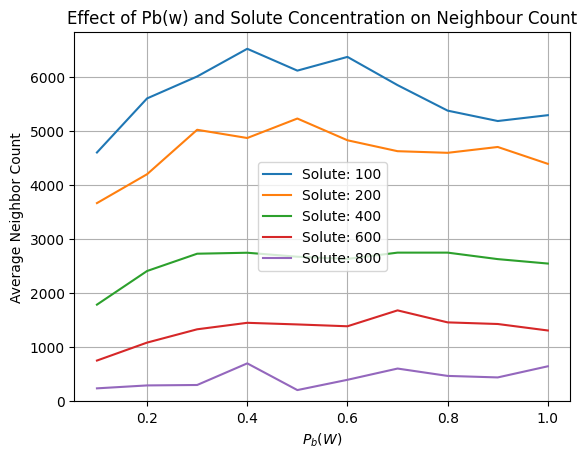

<Figure size 1920x1440 with 0 Axes>

In [30]:
# Plotting each solute concentration as a separate line with a confidence interval
for solute_concentration in solute_concentrations:
    averages = [all_results[pbw][solute_concentration]['average'] for pbw in pbw_values]
    std_devs = [all_results[pbw][solute_concentration]['std_dev'] for pbw in pbw_values]

    # Calculate confidence interval
    num_runs = runs
    confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)
    lower_bound = np.array(averages) - confidence_interval
    upper_bound = np.array(averages) + confidence_interval

    # Plot the average neighbor count
    plt.plot(pbw_values, averages, label=f'Solute: {solute_concentration}')
    plt.fill_between(pbw_values, lower_bound, upper_bound, alpha=0.2)

plt.xlabel('$P_b(W)$')
plt.ylabel('Average Neighbor Count')
plt.title('Effect of Pb(w) and Solute Concentration on Neighbour Count')
plt.legend()
plt.grid(True)

# plt.xlim(0, 100)
plt.ylim(bottom=0) 

plt.figure(dpi=300)

plt.show()

In [31]:
pbw_values = [0.0, 0.1, 0.2, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
results = []

runs = 5

all_results_no_solute = {pbw: [] for pbw in pbw_values}
total_molecules = 2087 # 55x55x0.69

for pbw_value in pbw_values:
    
    pbw_results = []

    for run in range(runs):
        print(f"Running simulation with {pbw_value} pbw value.")
        ca_grid = CA_grid(solute_amount=0)
        ca_rules = CA_rules(ca_grid, pbw=pbw_value, pbl_parameter=False, pbwl_parameter=False)

        final_grid = ca_rules.generate_simulation(pbw=pbw_value)

        count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
        pbw_results.append(count)
        #plt.imshow(final_grid)
        #plt.show()

    pbw_results = np.array(pbw_results)
    print(pbw_results)

    average_results = np.mean(pbw_results, axis=0)
    std_dev_results = np.std(pbw_results, axis=0)

    all_results_no_solute[pbw_value] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for pbw_value, data in all_results_no_solute.items():
    print(f"Pbw value: {pbw_value}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

Running simulation with 0.0 pbw value.
Running simulation with 0.0 pbw value.
Running simulation with 0.0 pbw value.
Running simulation with 0.0 pbw value.
Running simulation with 0.0 pbw value.
[3900 3812 3744 3740 3800]
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
[5804 5672 5608 5740 5764]
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
[6772 6988 6872 6844 6952]
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
[7212 7280 7412 7812 7488]
Running simulation with 0.32 pbw value.
Running simulation with 0.32 pbw value.
Running simulation with 0.32 pbw

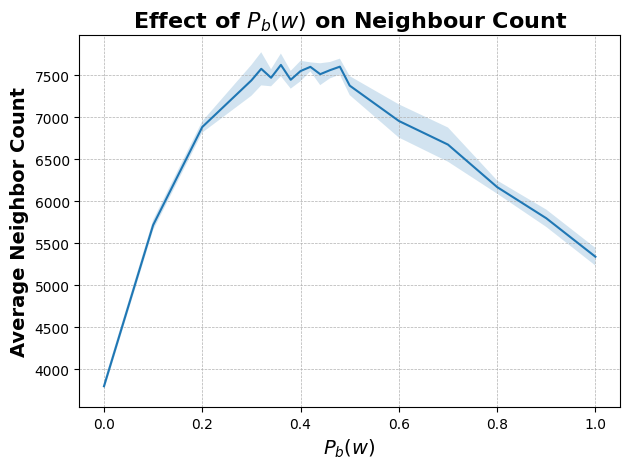

<Figure size 1920x1440 with 0 Axes>

In [32]:
pbw_values_percent = [value for value in pbw_values]  # Convert to percentage

# Extract averages and standard deviations for plotting
averages = [all_results_no_solute[pbw]['average'] for pbw in pbw_values]
std_devs = [all_results_no_solute[pbw]['std_dev'] for pbw in pbw_values]

# Calculate confidence interval for error bars
num_runs = 5
confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)

# Calculate lower and upper bounds for the confidence interval
lower_bound = np.array(averages) - confidence_interval
upper_bound = np.array(averages) + confidence_interval

# Plotting
plt.plot(pbw_values_percent, averages, label='Neighbor Count')
plt.fill_between(pbw_values_percent, lower_bound, upper_bound, alpha=0.2)

# Setting plot attributes
plt.xlabel('$P_b(w)$', fontsize=14, fontweight='bold')
plt.ylabel('Average Neighbor Count', fontsize=14, fontweight='bold')
plt.title('Effect of $P_b(w)$ on Neighbour Count', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.figure(dpi=300)
plt.show()

In [33]:
pbw_solute_values = [0.0, 0.1, 0.2, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
results_solute = []

runs = 5

all_results_solute = {pbw: [] for pbw in pbw_values}
total_molecules = 2087 # 55x55x0.69

for pbw_solute_value in pbw_solute_values:
    
    pbw_solute_results = []

    for run in range(runs):
        print(f"Running simulation with {pbw_solute_value} pbw value.")
        ca_grid = CA_grid(solute_amount=100)
        ca_rules = CA_rules(ca_grid, pbw=pbw_solute_value, pbl_parameter=False, pbwl_parameter=False)

        final_grid = ca_rules.generate_simulation(pbw=pbw_solute_value)

        count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
        pbw_solute_results.append(count)

    pbw_solute_results = np.array(pbw_solute_results)
    print(pbw_solute_results)

    average_results_solute = np.mean(pbw_solute_results, axis=0)
    std_dev_results_solute = np.std(pbw_solute_results, axis=0)

    all_results_solute[pbw_solute_value] = {
        'average': average_results_solute,
        'std_dev': std_dev_results_solute
    }

for pbw_solute_value, data in all_results_solute.items():
    print(f"Pbw value: {pbw_solute_value}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

Running simulation with 0.0 pbw value.
Running simulation with 0.0 pbw value.
Running simulation with 0.0 pbw value.
Running simulation with 0.0 pbw value.
Running simulation with 0.0 pbw value.
[3042 2874 2868 3160 3036]
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
[4566 4406 4750 4690 4326]
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
[5388 5374 5472 5576 5394]
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
[5930 6354 6064 6128 6148]
Running simulation with 0.32 pbw value.
Running simulation with 0.32 pbw value.
Running simulation with 0.32 pbw

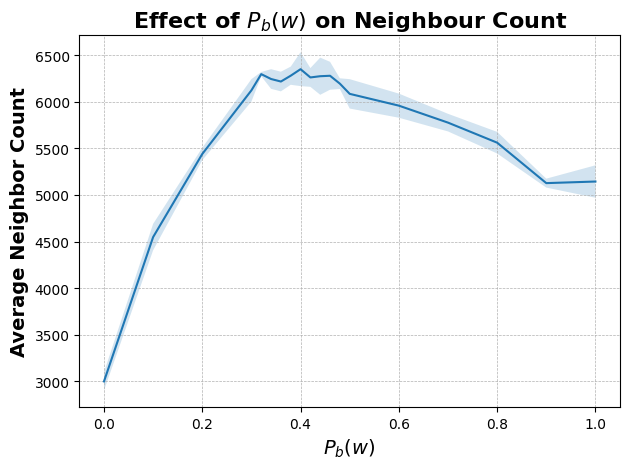

<Figure size 1920x1440 with 0 Axes>

In [34]:
pbw_solute_values_percent = [value for value in pbw_solute_values]  # Convert to percentage

# Extract averages and standard deviations for plotting
averages_solute = [all_results_solute[pbw]['average'] for pbw in pbw_solute_values]
std_devs_solute = [all_results_solute[pbw]['std_dev'] for pbw in pbw_solute_values]

# Calculate confidence interval for error bars
num_runs = 5
confidence_interval_solute = 1.96 * np.array(std_devs_solute) / np.sqrt(num_runs)

# Calculate lower and upper bounds for the confidence interval
lower_bound_solute = np.array(averages_solute) - confidence_interval_solute
upper_bound_solute = np.array(averages_solute) + confidence_interval_solute

# Plotting
plt.plot(pbw_solute_values_percent, averages_solute, label='Neighbor Count')
plt.fill_between(pbw_solute_values_percent, lower_bound_solute, upper_bound_solute, alpha=0.2)

# Setting plot attributes
plt.xlabel('$P_b(w)$', fontsize=14, fontweight='bold')
plt.ylabel('Average Neighbor Count', fontsize=14, fontweight='bold')
plt.title('Effect of $P_b(w)$ on Neighbour Count', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.figure(dpi=300)
plt.show()

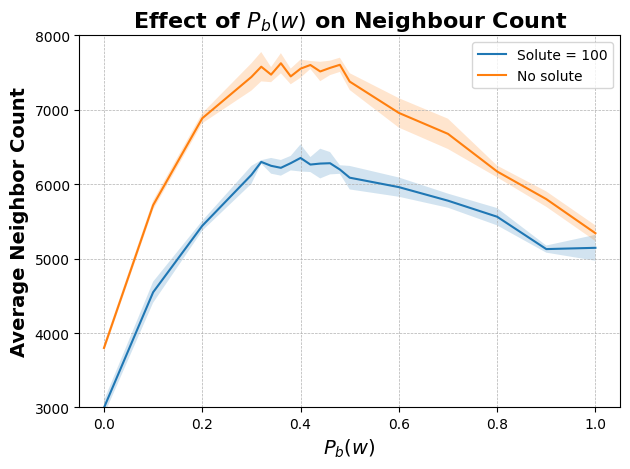

<Figure size 1920x1440 with 0 Axes>

In [35]:
### 2 plots 1 graph
# Plotting
plt.plot(pbw_solute_values_percent, averages_solute, label='Neighbor Count')
plt.plot(pbw_values_percent, averages, label='Neighbor Count')
plt.fill_between(pbw_solute_values_percent, lower_bound_solute, upper_bound_solute, alpha=0.2)
plt.fill_between(pbw_values_percent, lower_bound, upper_bound, alpha=0.2)

# Setting plot attributes
plt.xlabel('$P_b(w)$', fontsize=14, fontweight='bold')
plt.ylabel('Average Neighbor Count', fontsize=14, fontweight='bold')
plt.ylim(3000, 8000)
plt.title('Effect of $P_b(w)$ on Neighbour Count', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, labels = ['Solute = 100', 'No solute'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.figure(dpi=300)
plt.show()

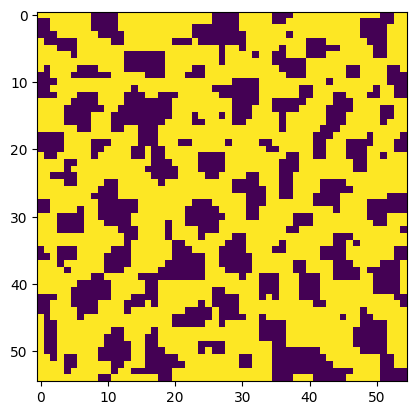

In [4]:
ca_grid = CA_grid(solute_amount=100)
ca_rules = CA_rules(ca_grid, pbw=0.0, pbl_parameter=False, pbwl_parameter=False)

final_grid = ca_rules.generate_simulation(pbw=0.1)

plt.imshow(final_grid)
plt.show()

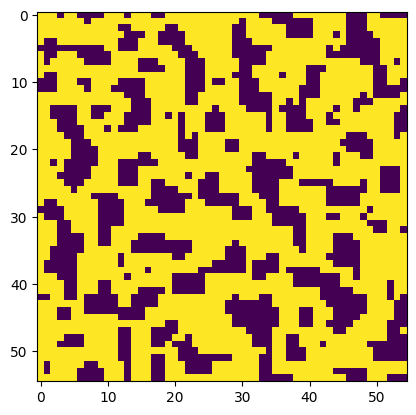

In [5]:
ca_grid = CA_grid(solute_amount=100)
ca_rules = CA_rules(ca_grid, pbw=0.4, pbl_parameter=False, pbwl_parameter=False)

final_grid = ca_rules.generate_simulation(pbw=0.1)

plt.imshow(final_grid)
plt.show()

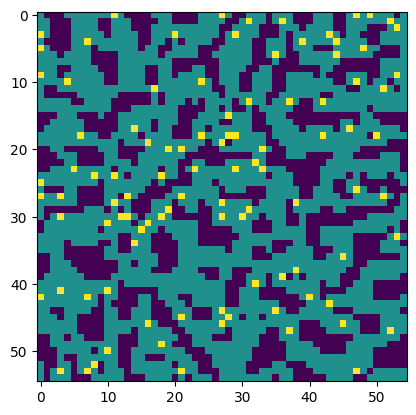

In [38]:
ca_grid = CA_grid(solute_amount=100)
ca_rules = CA_rules(ca_grid, pbw=0.9, pbl_parameter=False, pbwl_parameter=False)

final_grid = ca_rules.generate_simulation(pbw=0.1)

plt.imshow(final_grid)
plt.show()